## Projeto 3 - Modelagem e Simulação do Mundo Físico

Grupo 7 - Ana Carolina Souza, Eduardo Papandrea, Ivan Barros, Mariana Barbosa

### A queda da mola maluca

A mola maluca (ou Slinky) é um simples e divertido brinquedo, composto por uma longa mola que pode chegar a ```20 metros``` quando completamente esticada.

<img src="slinky.jpg" width=350> 

Quando submetido a queda livre, a parte inferior do Slinky flutua por alguns instantes. Até mesmo quando uma bolinha de tênis é acoplada ao fundo do brinquedo, ele continua "desafiando" a gravidade. Esse período de flutuação do brinquedo será chamado de *tempo de reação*.

Mas não só isso é especial sobre esse experimento! A parte superior da mola cai, aparentemente, com velocidade constante - contrariando o esperado numa queda livre.

Confira o vídeo que serviu de inspiração para o projeto: https://www.youtube.com/watch?v=eCMmmEEyOO0

#### Discretização

A rigor, o brinquedo é uma mola não ideal - com sua massa e elasticidade continuamente distribuídas. Contudo, para realizar a simulação, o Slinky será representado como uma série de massas conectadas por molas ideais.

<img src="slinky_dicretization.png" width=700> 

#### Perguntas a serem respondidas pelo modelo

- Como o tempo de reação da parte inferior da mola maluca varia com diferentes massas acopladas no brinquedo?
- Como a velocidade de queda da parte superior da mola maluca varia com diferentes massas acopladas no brinquedo?


### Modelo

Primeiramente, vamos analisar as forças que atuam em uma massa genérica da mola maluca.

<img src="forças.jpg" width=300> 

Consideremos um eixo que se inicia na posição inicial da massa superior, dirigido para baixo, e chamemos y(i) a posição da massa genérica. Assim:

<center>$F1=-k\cdot [y(i)-y(i-1)-l0]$</center>
<center>$F2=k\cdot [y(i+1)-y(i)-l0]$</center>
<center>$Fgrav=m\cdot g$</center>


A primeira e a última massa têm, respectivamente, $F1=0$ e $F2=0$.


Para iniciar a simulação, vamos importar as blibliotecas essenciais, definir os parâmetros necessários e posições iniciais.

In [13]:
# importa bibliotecas
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#constantes gerais

N = 90       # numero de massas
L = 0.575    # comprimento do Slinky relaxado
K = 1.75     # constante elástica total do Slinky
M = 0.225    # massa total do Slinky
g = 9.8      # aceleração da gravidade
H = 1.87

mu = 0       # massa acoplada ao final do Slinky

#constantes

m = M/N      # massa dividida
l0 = L/(N-1) # comprimento de cada mola ideal
k = K*(N-1)  # constante elástica de cada mola ideal

#define posições iniciais

y_inicial = [0]       # posição inicial da massa superior
j = (M + mu - m)
i = 1
while i < N:
    y_inicial.append(y_inicial[i-1] + l0 + j*g/k)     # adiciona os valores inicias das posições das massas, de acordo com o equilíbrio das forças
    j -= m
    i += 1

Cada massa possui uma equação diferencial diferente, que depende da sua posição e da posição das massas adjacentes. Por isso, a função ```modelo``` , que comporta as equações diferenciais do sistema, é definida da seguinte forma:

In [14]:
#define função que vai ser utilizada no odeint

def modelo(l, t, mu):
    y0 = l[0]
    vy0 = l[1] 
    y1 = l[2]
    vy1 = l[3] 
    y2 = l[4]
    vy2 = l[5]  
    y3 = l[6]
    vy3 = l[7] 
    y4 = l[8]
    vy4 = l[9] 
    y5 = l[10]
    vy5 = l[11]
    y6 = l[12]
    vy6 = l[13] 
    y7 = l[14]
    vy7 = l[15] 
    y8 = l[16]
    vy8 = l[17]  
    y9 = l[18]
    vy9 = l[19]
    y10 = l[20]
    vy10 = l[21] 
    y11 = l[22]
    vy11 = l[23] 
    y12 = l[24]
    vy12 = l[25]  
    y13 = l[26]
    vy13 = l[27] 
    y14 = l[28]
    vy14 = l[29] 
    y15 = l[30]
    vy15 = l[31]
    y16 = l[32]
    vy16 = l[33] 
    y17 = l[34]
    vy17 = l[35] 
    y18 = l[36]
    vy18 = l[37]  
    y19 = l[38]
    vy19 = l[39]
    y20 = l[40]
    vy20 = l[41] 
    y21 = l[42]
    vy21 = l[43] 
    y22 = l[44]
    vy22 = l[45]  
    y23 = l[46]
    vy23 = l[47] 
    y24 = l[48]
    vy24 = l[49] 
    y25 = l[50]
    vy25 = l[51]
    y26 = l[52]
    vy26 = l[53] 
    y27 = l[54]
    vy27 = l[55] 
    y28 = l[56]
    vy28 = l[57]  
    y29 = l[58]
    vy29 = l[59]
    y30 = l[60]
    vy30 = l[61] 
    y31 = l[62]
    vy31 = l[63] 
    y32 = l[64]
    vy32 = l[65]  
    y33 = l[66]
    vy33 = l[67] 
    y34 = l[68]
    vy34 = l[69] 
    y35 = l[70]
    vy35 = l[71]
    y36 = l[72]
    vy36 = l[73] 
    y37 = l[74]
    vy37 = l[75] 
    y38 = l[76]
    vy38 = l[77]  
    y39 = l[78]
    vy39 = l[79]
    y40 = l[80]
    vy40 = l[81] 
    y41 = l[82]
    vy41 = l[83] 
    y42 = l[84]
    vy42 = l[85]  
    y43 = l[86]
    vy43 = l[87] 
    y44 = l[88]
    vy44 = l[89] 
    y45 = l[90]
    vy45 = l[91]
    y46 = l[92]
    vy46 = l[93] 
    y47 = l[94]
    vy47 = l[95] 
    y48 = l[96]
    vy48 = l[97]  
    y49 = l[98]
    vy49 = l[99]
    y50 = l[100]
    vy50 = l[101] 
    y51 = l[102]
    vy51 = l[103] 
    y52 = l[104]
    vy52 = l[105]  
    y53 = l[106]
    vy53 = l[107] 
    y54 = l[108]
    vy54 = l[109] 
    y55 = l[110]
    vy55 = l[111]
    y56 = l[112]
    vy56 = l[113] 
    y57 = l[114]
    vy57 = l[115] 
    y58 = l[116]
    vy58 = l[117]  
    y59 = l[118]
    vy59 = l[119]
    y60 = l[120]
    vy60 = l[121] 
    y61 = l[122]
    vy61 = l[123] 
    y62 = l[124]
    vy62 = l[125]  
    y63 = l[126]
    vy63 = l[127] 
    y64 = l[128]
    vy64 = l[129] 
    y65 = l[130]
    vy65 = l[131]
    y66 = l[132]
    vy66 = l[133] 
    y67 = l[134]
    vy67 = l[135] 
    y68 = l[136]
    vy68 = l[137]  
    y69 = l[138]
    vy69 = l[139]
    y70 = l[140]
    vy70 = l[141] 
    y71 = l[142]
    vy71 = l[143] 
    y72 = l[144]
    vy72 = l[145]  
    y73 = l[146]
    vy73 = l[147] 
    y74 = l[148]
    vy74 = l[149] 
    y75 = l[150]
    vy75 = l[151]
    y76 = l[152]
    vy76 = l[153] 
    y77 = l[154]
    vy77 = l[155] 
    y78 = l[156]
    vy78 = l[157]  
    y79 = l[158]
    vy79 = l[159]
    y80 = l[160]
    vy80 = l[161] 
    y81 = l[162]
    vy81 = l[163] 
    y82 = l[164]
    vy82 = l[165]  
    y83 = l[166]
    vy83 = l[167] 
    y84 = l[168]
    vy84 = l[169] 
    y85 = l[170]
    vy85 = l[171]
    y86 = l[172]
    vy86 = l[173] 
    y87 = l[174]
    vy87 = l[175] 
    y88 = l[176]
    vy88 = l[177]  
    y89 = l[178]
    vy89 = l[179]
    
    if y89 <= H:           # enquanto a massa inferior não toca o chão
        dy0dt = vy0
        dy1dt = vy1
        dy2dt = vy2
        dy3dt = vy3
        dy4dt = vy4
        dy5dt = vy5
        dy6dt = vy6
        dy7dt = vy7
        dy8dt = vy8
        dy9dt = vy9
        dy10dt = vy10
        dy11dt = vy11
        dy12dt = vy12
        dy13dt = vy13
        dy14dt = vy14
        dy15dt = vy15
        dy16dt = vy16
        dy17dt = vy17
        dy18dt = vy18
        dy19dt = vy19
        dy20dt = vy20
        dy21dt = vy21
        dy22dt = vy22
        dy23dt = vy23
        dy24dt = vy24
        dy25dt = vy25
        dy26dt = vy26
        dy27dt = vy27
        dy28dt = vy28
        dy29dt = vy29
        dy30dt = vy30
        dy31dt = vy31
        dy32dt = vy32
        dy33dt = vy33
        dy34dt = vy34
        dy35dt = vy35
        dy36dt = vy36
        dy37dt = vy37
        dy38dt = vy38
        dy39dt = vy39
        dy40dt = vy40
        dy41dt = vy41
        dy42dt = vy42
        dy43dt = vy43
        dy44dt = vy44
        dy45dt = vy45
        dy46dt = vy46
        dy47dt = vy47
        dy48dt = vy48
        dy49dt = vy49
        dy50dt = vy50
        dy51dt = vy51
        dy52dt = vy52
        dy53dt = vy53
        dy54dt = vy54
        dy55dt = vy55
        dy56dt = vy56
        dy57dt = vy57
        dy58dt = vy58
        dy59dt = vy59
        dy60dt = vy60
        dy61dt = vy61
        dy62dt = vy62
        dy63dt = vy63
        dy64dt = vy64
        dy65dt = vy65
        dy66dt = vy66
        dy67dt = vy67
        dy68dt = vy68
        dy69dt = vy69
        dy70dt = vy70
        dy71dt = vy71
        dy72dt = vy72
        dy73dt = vy73
        dy74dt = vy74
        dy75dt = vy75
        dy76dt = vy76
        dy77dt = vy77
        dy78dt = vy78
        dy79dt = vy79
        dy80dt = vy80
        dy81dt = vy81
        dy82dt = vy82
        dy83dt = vy83
        dy84dt = vy84
        dy85dt = vy85
        dy86dt = vy86
        dy87dt = vy87
        dy88dt = vy88
        dy89dt = vy89
        dvy0dt = (1/m)*(m*g + k*(y1 - y0 - l0))                            # a massa superior não tem força elástica para cima
        dvy1dt = (1/m)*(m*g + k*(y2 - y1 - l0) - k*(y1 - y0 - l0))
        dvy2dt = (1/m)*(m*g + k*(y3 - y2 - l0) - k*(y2 - y1 - l0))
        dvy3dt = (1/m)*(m*g + k*(y4 - y3 - l0) - k*(y3 - y2 - l0))
        dvy4dt = (1/m)*(m*g + k*(y5 - y4 - l0) - k*(y4 - y3 - l0))
        dvy5dt = (1/m)*(m*g + k*(y6 - y5 - l0) - k*(y5 - y4 - l0))    
        dvy6dt = (1/m)*(m*g + k*(y7 - y6 - l0) - k*(y6 - y5 - l0))
        dvy7dt = (1/m)*(m*g + k*(y8 - y7 - l0) - k*(y7 - y6 - l0))    
        dvy8dt = (1/m)*(m*g + k*(y9 - y8 - l0) - k*(y8 - y7 - l0))
        dvy9dt = (1/m)*(m*g + k*(y10 - y9 - l0) - k*(y9 - y8 - l0))
        dvy10dt = (1/m)*(m*g + k*(y11 - y10 - l0) - k*(y10 - y9 - l0))
        dvy11dt = (1/m)*(m*g + k*(y12 - y11 - l0) - k*(y11 - y10 - l0))
        dvy12dt = (1/m)*(m*g + k*(y13 - y12 - l0) - k*(y12 - y11 - l0))
        dvy13dt = (1/m)*(m*g + k*(y14 - y13 - l0) - k*(y13 - y12 - l0))
        dvy14dt = (1/m)*(m*g + k*(y15 - y14 - l0) - k*(y14 - y13 - l0))
        dvy15dt = (1/m)*(m*g + k*(y16 - y15 - l0) - k*(y15 - y14 - l0))
        dvy16dt = (1/m)*(m*g + k*(y17 - y16 - l0) - k*(y16 - y15 - l0))
        dvy17dt = (1/m)*(m*g + k*(y18 - y17 - l0) - k*(y17 - y16 - l0))   
        dvy18dt = (1/m)*(m*g + k*(y19 - y18 - l0) - k*(y18 - y17 - l0))    
        dvy19dt = (1/m)*(m*g + k*(y20 - y19 - l0) - k*(y19 - y18 - l0))
        dvy20dt = (1/m)*(m*g + k*(y21 - y20 - l0) - k*(y20 - y19 - l0))
        dvy21dt = (1/m)*(m*g + k*(y22 - y21 - l0) - k*(y21 - y20 - l0))
        dvy22dt = (1/m)*(m*g + k*(y23 - y22 - l0) - k*(y22 - y21 - l0))
        dvy23dt = (1/m)*(m*g + k*(y24 - y23 - l0) - k*(y23 - y22 - l0))
        dvy24dt = (1/m)*(m*g + k*(y25 - y24 - l0) - k*(y24 - y23 - l0))
        dvy25dt = (1/m)*(m*g + k*(y26 - y25 - l0) - k*(y25 - y24 - l0))
        dvy26dt = (1/m)*(m*g + k*(y27 - y26 - l0) - k*(y26 - y25 - l0))
        dvy27dt = (1/m)*(m*g + k*(y28 - y27 - l0) - k*(y27 - y26 - l0))
        dvy28dt = (1/m)*(m*g + k*(y29 - y28 - l0) - k*(y28 - y27 - l0))
        dvy29dt = (1/m)*(m*g + k*(y30 - y29 - l0) - k*(y29 - y28 - l0))
        dvy30dt = (1/m)*(m*g + k*(y31 - y30 - l0) - k*(y30 - y29 - l0))
        dvy31dt = (1/m)*(m*g + k*(y32 - y31 - l0) - k*(y31 - y30 - l0))
        dvy32dt = (1/m)*(m*g + k*(y33 - y32 - l0) - k*(y32 - y31 - l0))
        dvy33dt = (1/m)*(m*g + k*(y34 - y33 - l0) - k*(y33 - y32 - l0))
        dvy34dt = (1/m)*(m*g + k*(y35 - y34 - l0) - k*(y34 - y33 - l0))
        dvy35dt = (1/m)*(m*g + k*(y36 - y35 - l0) - k*(y35 - y34 - l0))
        dvy36dt = (1/m)*(m*g + k*(y37 - y36 - l0) - k*(y36 - y35 - l0))    
        dvy37dt = (1/m)*(m*g + k*(y38 - y37 - l0) - k*(y37 - y36 - l0))
        dvy38dt = (1/m)*(m*g + k*(y39 - y38 - l0) - k*(y38 - y37 - l0))    
        dvy39dt = (1/m)*(m*g + k*(y40 - y39 - l0) - k*(y39 - y38 - l0))
        dvy40dt = (1/m)*(m*g + k*(y41 - y40 - l0) - k*(y40 - y39 - l0))
        dvy41dt = (1/m)*(m*g + k*(y42 - y41 - l0) - k*(y41 - y40 - l0))
        dvy42dt = (1/m)*(m*g + k*(y43 - y42 - l0) - k*(y42 - y41 - l0))
        dvy43dt = (1/m)*(m*g + k*(y44 - y43 - l0) - k*(y43 - y42 - l0))
        dvy44dt = (1/m)*(m*g + k*(y45 - y44 - l0) - k*(y44 - y43 - l0))
        dvy45dt = (1/m)*(m*g + k*(y46 - y45 - l0) - k*(y45 - y44 - l0))
        dvy46dt = (1/m)*(m*g + k*(y47 - y46 - l0) - k*(y46 - y45 - l0))
        dvy47dt = (1/m)*(m*g + k*(y48 - y47 - l0) - k*(y47 - y46 - l0))
        dvy48dt = (1/m)*(m*g + k*(y49 - y48 - l0) - k*(y48 - y47 - l0))
        dvy49dt = (1/m)*(m*g + k*(y50 - y49 - l0) - k*(y49 - y48 - l0))
        dvy50dt = (1/m)*(m*g + k*(y51 - y50 - l0) - k*(y50 - y49 - l0))    
        dvy51dt = (1/m)*(m*g + k*(y52 - y51 - l0) - k*(y51 - y50 - l0))
        dvy52dt = (1/m)*(m*g + k*(y53 - y52 - l0) - k*(y52 - y51 - l0))
        dvy53dt = (1/m)*(m*g + k*(y54 - y53 - l0) - k*(y53 - y52 - l0))
        dvy54dt = (1/m)*(m*g + k*(y55 - y54 - l0) - k*(y54 - y53 - l0))
        dvy55dt = (1/m)*(m*g + k*(y56 - y55 - l0) - k*(y55 - y54 - l0))
        dvy56dt = (1/m)*(m*g + k*(y57 - y56 - l0) - k*(y56 - y55 - l0))
        dvy57dt = (1/m)*(m*g + k*(y58 - y57 - l0) - k*(y57 - y56 - l0))
        dvy58dt = (1/m)*(m*g + k*(y59 - y58 - l0) - k*(y58 - y57 - l0))
        dvy59dt = (1/m)*(m*g + k*(y60 - y59 - l0) - k*(y59 - y58 - l0))
        dvy60dt = (1/m)*(m*g + k*(y61 - y60 - l0) - k*(y60 - y59 - l0))
        dvy61dt = (1/m)*(m*g + k*(y62 - y61 - l0) - k*(y61 - y60 - l0))
        dvy62dt = (1/m)*(m*g + k*(y63 - y62 - l0) - k*(y62 - y61 - l0))    
        dvy63dt = (1/m)*(m*g + k*(y64 - y63 - l0) - k*(y63 - y62 - l0))    
        dvy64dt = (1/m)*(m*g + k*(y65 - y64 - l0) - k*(y64 - y63 - l0))
        dvy65dt = (1/m)*(m*g + k*(y66 - y65 - l0) - k*(y65 - y64 - l0))
        dvy66dt = (1/m)*(m*g + k*(y67 - y66 - l0) - k*(y66 - y65 - l0))
        dvy67dt = (1/m)*(m*g + k*(y68 - y67 - l0) - k*(y67 - y66 - l0))
        dvy68dt = (1/m)*(m*g + k*(y69 - y68 - l0) - k*(y68 - y67 - l0))
        dvy69dt = (1/m)*(m*g + k*(y70 - y69 - l0) - k*(y69 - y68 - l0))
        dvy70dt = (1/m)*(m*g + k*(y71 - y70 - l0) - k*(y70 - y69 - l0))
        dvy71dt = (1/m)*(m*g + k*(y72 - y71 - l0) - k*(y71 - y70 - l0))
        dvy72dt = (1/m)*(m*g + k*(y73 - y72 - l0) - k*(y72 - y71 - l0))
        dvy73dt = (1/m)*(m*g + k*(y74 - y73 - l0) - k*(y73 - y72 - l0))
        dvy74dt = (1/m)*(m*g + k*(y75 - y74 - l0) - k*(y74 - y73 - l0))
        dvy75dt = (1/m)*(m*g + k*(y76 - y75 - l0) - k*(y75 - y74 - l0))    
        dvy76dt = (1/m)*(m*g + k*(y77 - y76 - l0) - k*(y76 - y75 - l0))
        dvy77dt = (1/m)*(m*g + k*(y78 - y77 - l0) - k*(y77 - y76 - l0)) 
        dvy78dt = (1/m)*(m*g + k*(y79 - y78 - l0) - k*(y78 - y77 - l0))
        dvy79dt = (1/m)*(m*g + k*(y80 - y79 - l0) - k*(y79 - y78 - l0))
        dvy80dt = (1/m)*(m*g + k*(y81 - y80 - l0) - k*(y80 - y79 - l0))
        dvy81dt = (1/m)*(m*g + k*(y82 - y81 - l0) - k*(y81 - y80 - l0))
        dvy82dt = (1/m)*(m*g + k*(y83 - y82 - l0) - k*(y82 - y81 - l0))
        dvy83dt = (1/m)*(m*g + k*(y84 - y83 - l0) - k*(y83 - y82 - l0))
        dvy84dt = (1/m)*(m*g + k*(y85 - y84 - l0) - k*(y84 - y83 - l0))
        dvy85dt = (1/m)*(m*g + k*(y86 - y85 - l0) - k*(y85 - y84 - l0))    
        dvy86dt = (1/m)*(m*g + k*(y87 - y86 - l0) - k*(y86 - y85 - l0))
        dvy87dt = (1/m)*(m*g + k*(y88 - y87 - l0) - k*(y87 - y86 - l0)) 
        dvy88dt = (1/m)*(m*g + k*(y89 - y88 - l0) - k*(y88 - y87 - l0))
        dvy89dt = (1/m)*(m*g - k*(y89 - y88 - l0) + mu*g)                  # a massa inferior não tem força elástica para baixo
    else:             # quando a massa inferior toca o chão
        dy0dt = 0
        dy1dt = 0
        dy2dt = 0
        dy3dt = 0
        dy4dt = 0
        dy5dt = 0
        dy6dt = 0
        dy7dt = 0
        dy8dt = 0
        dy9dt = 0
        dy10dt = 0
        dy11dt = 0
        dy12dt = 0
        dy13dt = 0
        dy14dt = 0
        dy15dt = 0
        dy16dt = 0
        dy17dt = 0
        dy18dt = 0
        dy19dt = 0
        dy20dt = 0
        dy21dt = 0
        dy22dt = 0
        dy23dt = 0
        dy24dt = 0
        dy25dt = 0
        dy26dt = 0
        dy27dt = 0
        dy28dt = 0
        dy29dt = 0
        dy30dt = 0
        dy31dt = 0
        dy32dt = 0
        dy33dt = 0
        dy34dt = 0
        dy35dt = 0
        dy36dt = 0
        dy37dt = 0
        dy38dt = 0
        dy39dt = 0
        dy40dt = 0
        dy41dt = 0
        dy42dt = 0
        dy43dt = 0
        dy44dt = 0
        dy45dt = 0
        dy46dt = 0
        dy47dt = 0
        dy48dt = 0
        dy49dt = 0
        dy50dt = 0
        dy51dt = 0
        dy52dt = 0
        dy53dt = 0
        dy54dt = 0
        dy55dt = 0
        dy56dt = 0
        dy57dt = 0
        dy58dt = 0
        dy59dt = 0
        dy60dt = 0
        dy61dt = 0
        dy62dt = 0
        dy63dt = 0
        dy64dt = 0
        dy65dt = 0
        dy66dt = 0
        dy67dt = 0
        dy68dt = 0
        dy69dt = 0
        dy70dt = 0
        dy71dt = 0
        dy72dt = 0
        dy73dt = 0
        dy74dt = 0
        dy75dt = 0
        dy76dt = 0
        dy77dt = 0
        dy78dt = 0
        dy79dt = 0
        dy80dt = 0
        dy81dt = 0
        dy82dt = 0
        dy83dt = 0
        dy84dt = 0
        dy85dt = 0
        dy86dt = 0
        dy87dt = 0
        dy88dt = 0
        dy89dt = 0
        dvy0dt = 0
        dvy1dt = 0
        dvy2dt = 0
        dvy3dt = 0
        dvy4dt = 0
        dvy5dt = 0
        dvy6dt = 0
        dvy7dt = 0
        dvy8dt = 0
        dvy9dt = 0
        dvy10dt = 0
        dvy11dt = 0
        dvy12dt = 0
        dvy13dt = 0
        dvy14dt = 0
        dvy15dt = 0
        dvy16dt = 0
        dvy17dt = 0
        dvy18dt = 0
        dvy19dt = 0
        dvy20dt = 0
        dvy21dt = 0
        dvy22dt = 0
        dvy23dt = 0
        dvy24dt = 0
        dvy25dt = 0
        dvy26dt = 0
        dvy27dt = 0
        dvy28dt = 0
        dvy29dt = 0
        dvy30dt = 0
        dvy31dt = 0
        dvy32dt = 0
        dvy33dt = 0
        dvy34dt = 0
        dvy35dt = 0
        dvy36dt = 0
        dvy37dt = 0
        dvy38dt = 0
        dvy39dt = 0
        dvy40dt = 0
        dvy41dt = 0
        dvy42dt = 0
        dvy43dt = 0
        dvy44dt = 0
        dvy45dt = 0
        dvy46dt = 0
        dvy47dt = 0
        dvy48dt = 0
        dvy49dt = 0
        dvy50dt = 0
        dvy51dt = 0
        dvy52dt = 0
        dvy53dt = 0
        dvy54dt = 0
        dvy55dt = 0
        dvy56dt = 0
        dvy57dt = 0
        dvy58dt = 0
        dvy59dt = 0
        dvy60dt = 0
        dvy61dt = 0
        dvy62dt = 0
        dvy63dt = 0
        dvy64dt = 0
        dvy65dt = 0
        dvy66dt = 0
        dvy67dt = 0
        dvy68dt = 0
        dvy69dt = 0
        dvy70dt = 0
        dvy71dt = 0
        dvy72dt = 0
        dvy73dt = 0
        dvy74dt = 0
        dvy75dt = 0
        dvy76dt = 0
        dvy77dt = 0
        dvy78dt = 0
        dvy79dt = 0
        dvy80dt = 0
        dvy81dt = 0
        dvy82dt = 0
        dvy83dt = 0
        dvy84dt = 0
        dvy85dt = 0
        dvy86dt = 0
        dvy87dt = 0
        dvy88dt = 0
        dvy89dt = 0
    
    dldt = [dy0dt, dvy0dt, dy1dt, dvy1dt, dy2dt, dvy2dt, dy3dt, dvy3dt, dy4dt, dvy4dt, dy5dt, dvy5dt, dy6dt, dvy6dt, dy7dt, dvy7dt, dy8dt, dvy8dt, dy9dt, dvy9dt, dy10dt, dvy10dt, dy11dt, dvy11dt, dy12dt, dvy12dt, dy13dt, dvy13dt, dy14dt, dvy14dt, dy15dt, dvy15dt, dy16dt, dvy16dt, dy17dt, dvy17dt, dy18dt, dvy18dt, dy19dt, dvy19dt, dy20dt, dvy20dt, dy21dt, dvy21dt, dy22dt, dvy22dt, dy23dt, dvy23dt, dy24dt, dvy24dt, dy25dt, dvy25dt, dy26dt, dvy26dt, dy27dt, dvy27dt, dy28dt, dvy28dt, dy29dt, dvy29dt, dy30dt, dvy30dt, dy31dt, dvy31dt, dy32dt, dvy32dt, dy33dt, dvy33dt, dy34dt, dvy34dt, dy35dt, dvy35dt, dy36dt, dvy36dt, dy37dt, dvy37dt, dy38dt, dvy38dt, dy39dt, dvy39dt, dy40dt, dvy40dt, dy41dt, dvy41dt, dy42dt, dvy42dt, dy43dt, dvy43dt, dy44dt, dvy44dt, dy45dt, dvy45dt, dy46dt, dvy46dt, dy47dt, dvy47dt, dy48dt, dvy48dt, dy49dt, dvy49dt, dy50dt, dvy50dt, dy51dt, dvy51dt, dy52dt, dvy52dt, dy53dt, dvy53dt, dy54dt, dvy54dt, dy55dt, dvy55dt, dy56dt, dvy56dt, dy57dt, dvy57dt, dy58dt, dvy58dt, dy59dt, dvy59dt, dy60dt, dvy60dt, dy61dt, dvy61dt, dy62dt, dvy62dt, dy63dt, dvy63dt, dy64dt, dvy64dt, dy65dt, dvy65dt, dy66dt, dvy66dt, dy67dt, dvy67dt, dy68dt, dvy68dt, dy69dt, dvy69dt, dy70dt, dvy70dt, dy71dt, dvy71dt, dy72dt, dvy72dt, dy73dt, dvy73dt, dy74dt, dvy74dt, dy75dt, dvy75dt, dy76dt, dvy76dt, dy77dt, dvy77dt, dy78dt, dvy78dt, dy79dt, dvy79dt, dy80dt, dvy80dt, dy81dt, dvy81dt, dy82dt, dvy82dt, dy83dt, dvy83dt, dy84dt, dvy84dt, dy85dt, dvy85dt, dy86dt, dvy86dt, dy87dt, dvy87dt, dy88dt, dvy88dt, dy89dt, dvy89dt]
    
    #ao ser integrada, a função vai retornar posições nos índices pares e velocidades nos índices ímpares
    
    return dldt
    

A seguir, vamos utilizar a funçao ```odeint``` para obter as posições e velocidades das massas ao longo do tempo.

In [15]:
t_lista = np.arange(0, 1, 0.01)     # cria a lista de tempo que vai ser utlizada no odeint

l_0 = []     # cria lista de condições iniciais
i=0
while i < N:
    l_0.append(y_inicial[i])   # adiciona as posições iniciais nos índices pares
    l_0.append(0)              # adiciona o valor 0 das velocidades iniciais nos índices ímpares
    i+=1

l_lista = odeint(modelo, l_0, t_lista, args=(0, ))      # cria a lista de resolução das equações diferenciais

Por conseguinte, vamos plotar os gráficos das variáveis ao longo do tempo.

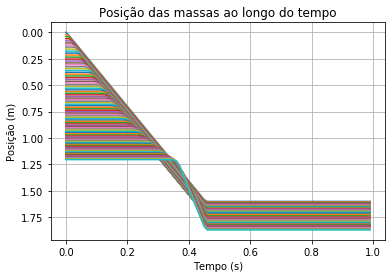

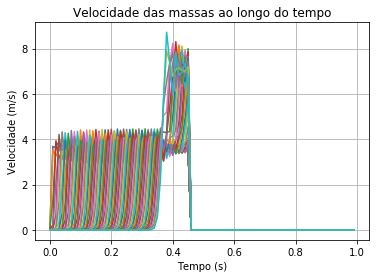

In [16]:
%matplotlib inline

for i in range(N):
    plt.plot(t_lista, l_lista[:, 2*i])       # plota os índices pares da lista, relativos a posição

plt.ylabel('Posição (m)')
plt.xlabel('Tempo (s)')
plt.gca().invert_yaxis()
plt.title('Posição das massas ao longo do tempo')
plt.grid(True)
plt.show()


for i in range(N):
    j = 0
    while j < len(t_lista):
        if l_lista[:, 2*i][j] == max(l_lista[:, 2*i]):      # se a massa atinge a posição final
            l_lista[:, 2*i+1][j] = 0                        # impoe v = 0 
        j+=1
    plt.plot(t_lista, l_lista[:, 2*i+1])                    # plota os índices ímpares da lista, relativos a velocidade
    
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Tempo (s)')
plt.title('Velocidade das massas ao longo do tempo')
plt.grid(True)
plt.show()

#### Massas acopladas 

Agora, vamos incrementar o experimento adicionando massas na parte inferior do brinquedo. Pela realizarmos a análise, vamos plotar gráficos relativos apenas às massas inferior e superior.

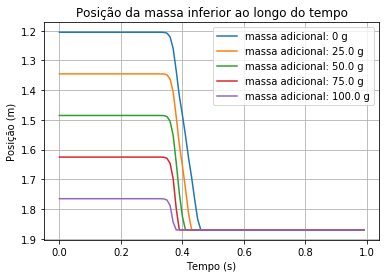

In [17]:
%matplotlib inline

t_reaçao = []     # cria lista que vai abrigar valores dos tempos de reação

massa_ultima = [0, 0.025, 0.05, 0.075, 0.1]       # lista de massas acopladas
massa_ultima_g = []                               # cria lista que vai abrigar valores de massas acopladas em gramas
i = 0
while i<len(massa_ultima):
    massa_ultima_g.append(massa_ultima[i]*1000)   # multiplica a massa em kg por 1000
    i+=1
    
    
for massa in massa_ultima:
    
    # recria as posições iniciais para cada valor de massa acoplada, seguindo a mesma lógica anterior.
    
    y_inicial = [0]
    j = (M + massa - m)
    i = 1
    while i < N:
        y_inicial.append(y_inicial[i-1] + l0 + j*g/k)
        j -= m
        i += 1
        
    # recria a lista de condições iniciais para cada valor de massa acoplada, seguindo a mesma lógica anterior.
        
    l_0 = []
    i=0
    while i < N:
        l_0.append(y_inicial[i])
        l_0.append(0)
        i+=1
    
    # recria a lista de resolução das equações diferenciais para cada valor de massa acoplada.
    
    x = odeint(modelo, l_0, t_lista, args=(massa, ))
    plt.plot(t_lista, x[:, 178], label = 'massa adicional: {} g'.format(1000*massa))   # plota os gráficos de posição para cada valor de massa acoplada
    
    
    j = 0
    while j < len(x[:, 178]):
        if round(x[:, 178][j], 1) == round(x[:, 178][0], 1):   # se a posição da massa não mudou
            j+=1
        else:                                                  # se a posição da massa mudou
            t_reaçao.append(t_lista[j])                        # adiciona o tempo de reação à lista
            j = len(x[:, 178])
        
        
plt.ylabel('Posição (m)')
plt.xlabel('Tempo (s)')
plt.title('Posição da massa inferior ao longo do tempo')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()

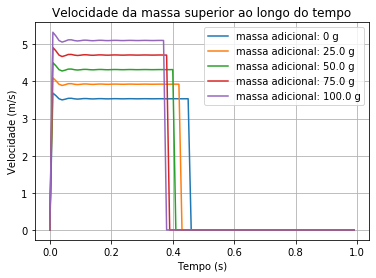

In [18]:
%matplotlib inline

v_media = []      # cria lista que vai abrigar valores de velocidade média da massa superior durante a queda

for massa in massa_ultima:
    
    # recria as posições iniciais para cada valor de massa acoplada, seguindo a mesma lógica anterior.
    
    y_inicial = [0]
    j = (M + massa - m)
    i = 1
    while i < N:
        y_inicial.append(y_inicial[i-1] + l0 + j*g/k)
        j -= m
        i += 1
        
    # recria a lista de condições iniciais para cada valor de massa acoplada, seguindo a mesma lógica anterior.
    
    l_0 = []
    i=0
    while i < N:
        l_0.append(y_inicial[i])
        l_0.append(0)
        i+=1
        
    # recria a lista de resolução das equações diferenciais para cada valor de massa acoplada.
    
    x = odeint(modelo, l_0, t_lista, args=(massa, ))

    j = 0
    while j < len(t_lista):
        if x[:, 0][j] == max(x[:, 0]):      # se a massa atinge a posição final
            x[:, 1][j] = 0                  # impoe v = 0
        j+=1
    plt.plot(t_lista, x[:, 1], label = 'massa adicional: {} g'.format(1000*massa))   # plota os gráficos de velocidade para cada valor de massa acoplada
    
    j = 1                                   
    while j < len(t_lista):
        if round(x[:, 1][j], 1) == 0.0:                      # se a velocidade atinge valor 0
            v_media.append(sum(x[:, 1][1:(j-1)])/(j-1))      # adiciona a velocidade média da massa superior à lista
            j = len(t_lista)
        else:
            j+=1


plt.ylabel('Velocidade (m/s)')
plt.xlabel('Tempo (s)')
plt.legend()
plt.title('Velocidade da massa superior ao longo do tempo')
plt.grid(True)
plt.show()

Perceba que, como observado no vídeo, a velocidade de queda da massa superior é praticamente constante!

##### Gráficos Conclusivos

Agora, vamos plotar os gráficos que respondem as perguntas iniciais.

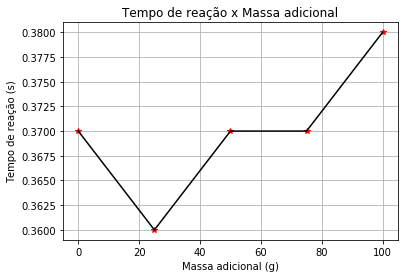

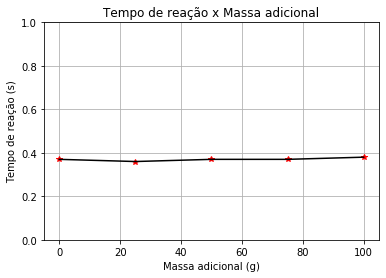

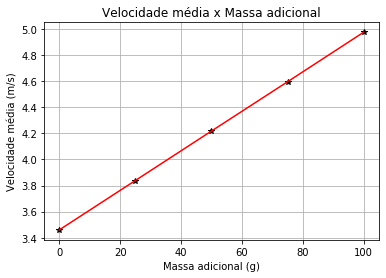

In [19]:
%matplotlib inline

# grafico do tempo de reação da massa inferior

plt.plot(massa_ultima_g, t_reaçao, 'r*')
plt.plot(massa_ultima_g, t_reaçao, 'k')
plt.ylabel('Tempo de reação (s)')
plt.xlabel('Massa adicional (g)')
plt.title('Tempo de reação x Massa adicional')
plt.grid(True)
plt.show()

# grafico do tempo de reação da massa inferior em outra escala

plt.plot(massa_ultima_g, t_reaçao, 'r*')
plt.plot(massa_ultima_g, t_reaçao, 'k')
plt.ylim(0, 1)
plt.ylabel('Tempo de reação (s)')
plt.xlabel('Massa adicional (g)')
plt.title('Tempo de reação x Massa adicional')
plt.grid(True)
plt.show()

# grafico da velocidade média da massa superior

plt.plot(massa_ultima_g, v_media, 'k*')
plt.plot(massa_ultima_g, v_media, 'r')
plt.ylabel('Velocidade média (m/s)')
plt.xlabel('Massa adicional (g)')
plt.title('Velocidade média x Massa adicional')
plt.grid(True)
plt.show()

### Validação

Com os dados obtidos pela análise do vídeo, com uso do software Tracker, é possível plotar um gráfico das posições da mola inferior e superior. Plotando esse gráfico junto ao do modelo, encontramos os valores ideais de ```M``` e ```K```.

<center>$M=225g$</center>
<center>$K=1,75 N/m$</center>


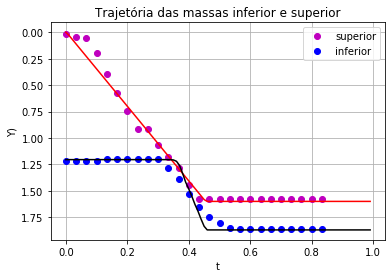

In [20]:
%matplotlib inline

import pandas
colunas = ['t', 'y', 'vy']
data = pandas.read_csv('massacima2.csv', names=colunas)        # importa os dados obtidos sobre a massa superior
data2 = pandas.read_csv('massabaixo2.csv', names=colunas)      # importa os dados obtidos sobre a massa inferior

#transforma os dados lidos em listas

ttopo = data.t.tolist()
ytopo = data.y.tolist()
vytopo = data.vy.tolist()

tbaixo = data2.t.tolist()
ybaixo = data2.y.tolist()
vybaixo = data2.vy.tolist()

#elimina os valores iniciais do vídeo em que o experimento não se iniciou

i = 0
while i < len(ybaixo):
    if i < len(ybaixo) - 3:
        ybaixo[i] = ybaixo[i+3]
        ytopo[i] = ytopo[i+3]
    else:
        ybaixo[i] = ybaixo[len(ybaixo) - 3]
        ytopo[i] = ytopo[len(ybaixo) - 3]
    i+=1

t_real = []
ytopo1 = []
ybaixo1 = []
vytopo1 = []
vybaixo1 =[]

i = 0
while i < len(ybaixo) - 3:
    
    # ajusta o tempo para que t = 0 seja quando o experimento se inicia no vídeo
    t_real.append(ttopo[i+3] - 0.1)
    
    #inverte os eixos
    ytopo1.append(ytopo[i]*(-1))
    vytopo1.append(vytopo[i]*(-1))
    ybaixo1.append(ybaixo[i]*(-1))
    vybaixo1.append(vybaixo[i]*(-1))
    i+=1

plt.title('Trajetória das massas inferior e superior')
plt.plot(t_real, ytopo1, 'mo', label = 'superior')       # plota o gráfico dos dados experimentais a respeito do massa superior
plt.plot(t_real, ybaixo1, 'bo', label = 'inferior')     # plota o gráfico dos dados experimentais a respeito do massa inferior
plt.plot(t_lista, l_lista[:, 0], 'r')                # plota o gráfico dos dados do modelo a respeito do massa superior
plt.plot(t_lista, l_lista[:, 178], 'k')              # plota o gráfico dos dados do modelo a respeito do massa superior

plt.ylabel('Y)')
plt.xlabel('t')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

### Animação

Por fim, podemos criar uma animação da simulação realizada.

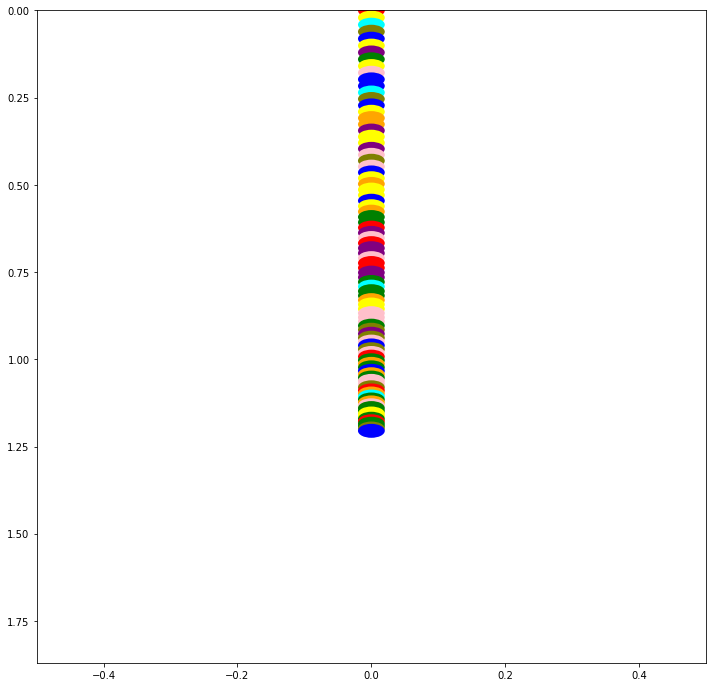

In [27]:
%matplotlib qt5

# recria as posições iniciais para a situação sem massa acoplada, seguindo a mesma lógica anterior.

y_inicial = [0]
j = (M - m)
i = 1
while i < N:
    y_inicial.append(y_inicial[i-1] + l0 + j*g/k)
    j -= m
    i += 1

# recria a lista de condições iniciais para a situação sem massa acoplada, seguindo a mesma lógica anterior.
    
l_0 = []
i=0
while i < N:
    l_0.append(y_inicial[i])
    l_0.append(0)
    i+=1
    
# recria a lista de resolução das equações diferenciais para a situação sem massa acoplada, seguindo a mesma lógica anterior.

l_lista = odeint(modelo, l_0, t_lista, args=(0, ))  

# cria a animação

plt.close('all')
get_ipython().magic('matplotlib qt5')
import matplotlib.patches as patches
from matplotlib import animation
import random

y = []
massas = []

# Determina o tamanho da figura e iguala as escalas x e y
fig, ax = plt.subplots(figsize=(12,12), facecolor='white')
#plt.axis('equal')

# Dimensão dos eixos
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(1.87, 0)
ax.set_facecolor("white")

for i in range(N):
    y.append(l_lista[:, 2*i])
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'olive', 'cyan', 'yellow']
    massas.append(patches.Circle((0, y_inicial[i]), 0.02, fc=random.choice(colors)))
    
def init():
    # Inclui as figuras que serão desenhadas
    for i in range(N):
        ax.add_patch(massas[i])
    return None

def animate(j):
    for i in range(N):
        massas[i].center=(0, y[i][j])
    return None

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(l_lista[:, 0]), interval=60, blit=False)
plt.show()